<a href="https://colab.research.google.com/github/dheemanthAthreya/6thSem-ML-Lab/blob/main/1BM22CS347_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

dataset can be found at: [https://www.kaggle.com/datasets/shwetabh123/mall-customers/data](https://www.kaggle.com/datasets/shwetabh123/mall-customers/data)

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

scaler = StandardScaler()

df_scaled_fit = scaler.fit_transform(df_scaled)

In [6]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [7]:
var_list_1 = df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [8]:
ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)

    ssd.append(kmeans1.inertia_)

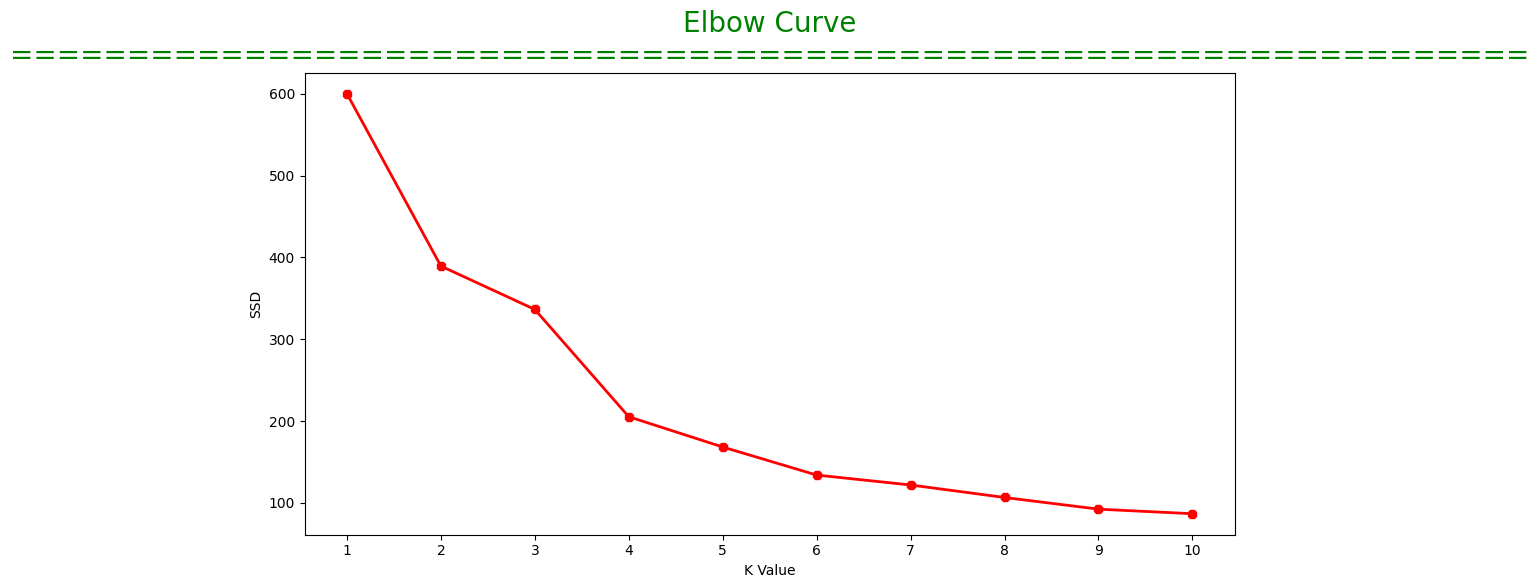

In [9]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [25]:
kmeans1 = KMeans(n_clusters=5, max_iter=500)
kmeans1.fit(var_list_1)

KMeans(max_iter=500, n_clusters=5)

In [26]:
kmeans1.labels_

array([4, 4, 3, 4, 4, 4, 3, 4, 2, 4, 2, 4, 2, 4, 3, 4, 3, 4, 2, 4, 3, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4,
       2, 4, 2, 3, 3, 3, 2, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [27]:
df["Label"] = kmeans1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [28]:
silhouette_avg = silhouette_score(df_scaled_fit, df["Label"])

print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.40846873777345605
